<a href="https://colab.research.google.com/github/fathanzys/Data/blob/main/0102522025_UAS-DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# TOC #1 — Import Library
import numpy as np                   # Untuk operasi numerik
import pandas as pd                 # Untuk manipulasi dan pembacaan data
import matplotlib.pyplot as plt     # Untuk visualisasi
import seaborn as sns               # Untuk heatmap dan plot statistik

# Untuk modeling dan evaluasi
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib                       # Untuk menyimpan model

In [19]:
# TOC #2 — Load Dataset & Eksplorasi Awal
# Membaca dataset dari file CSV
df = pd.read_csv('/content/data_balita.csv')

# Menampilkan 5 baris pertama data
print("Contoh 5 data teratas:")
print(df.head())

# Menampilkan informasi struktur dataset
print("\nInformasi Dataset:")
print(df.info())

# Menampilkan ringkasan statistik
print("\nStatistik Deskriptif:")
print(df.describe(include='all'))

# Melihat distribusi label target (Status Gizi)
print("\nDistribusi Status Gizi:")
print(df['Status Gizi'].value_counts())

Contoh 5 data teratas:
   Umur (bulan) Jenis Kelamin  Tinggi Badan (cm)       Status Gizi
0             0     laki-laki          44.591973           stunted
1             0     laki-laki          56.705203            tinggi
2             0     laki-laki          46.863358            normal
3             0     laki-laki          47.508026            normal
4             0     laki-laki          42.743494  severely stunted

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB
None

Statistik Deskriptif:
         Umur (bulan) Jenis Kelamin  Tinggi Badan (cm) Status

In [20]:
# TOC #3 — Preprocessing & Encoding

# Cek apakah ada nilai kosong
print("Cek missing value:\n")
print(df.isnull().sum())

# Encode kolom 'Jenis Kelamin': laki-laki = 0, perempuan = 1
df['Jenis Kelamin'] = df['Jenis Kelamin'].map({'laki-laki': 0, 'perempuan': 1})

# Encode kolom 'Status Gizi' ke angka:
# severely stunted = 0, stunted = 1, normal = 2, tinggi = 3
label_mapping = {
    'severely stunted': 0,
    'stunted': 1,
    'normal': 2,
    'tinggi': 3
}
df['Status Gizi'] = df['Status Gizi'].map(label_mapping)

# Verifikasi hasil encoding
print("\nContoh data setelah encoding:")
print(df.head())

# Cek ulang distribusi status gizi dalam bentuk angka
print("\nDistribusi label setelah encoding:")
print(df['Status Gizi'].value_counts())

Cek missing value:

Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          0
dtype: int64

Contoh data setelah encoding:
   Umur (bulan)  Jenis Kelamin  Tinggi Badan (cm)  Status Gizi
0             0              0          44.591973            1
1             0              0          56.705203            3
2             0              0          46.863358            2
3             0              0          47.508026            2
4             0              0          42.743494            0

Distribusi label setelah encoding:
Status Gizi
2    67755
0    19869
3    19560
1    13815
Name: count, dtype: int64


In [21]:
# TOC #4 — Split Data Latih dan Uji

# Memisahkan fitur (X) dan target (y)
X = df.drop('Status Gizi', axis=1)
y = df['Status Gizi']

# Membagi dataset: 80% data latih, 20% data uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # agar proporsi label tetap sama di data latih dan uji
)

# Cek ukuran dataset
print("Ukuran data latih:", X_train.shape)
print("Ukuran data uji:", X_test.shape)

Ukuran data latih: (96799, 3)
Ukuran data uji: (24200, 3)


In [22]:
# TOC #5 — Pelatihan & Prediksi Model KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Buat model KNN dengan k=3 (nilai umum & stabil)
knn = KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')

# Latih model dengan data latih
knn.fit(X_train, y_train)

# Prediksi dengan data uji
y_pred = knn.predict(X_test)

# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model KNN (k=3):", round(accuracy, 4))

Akurasi model KNN (k=3): 0.9976


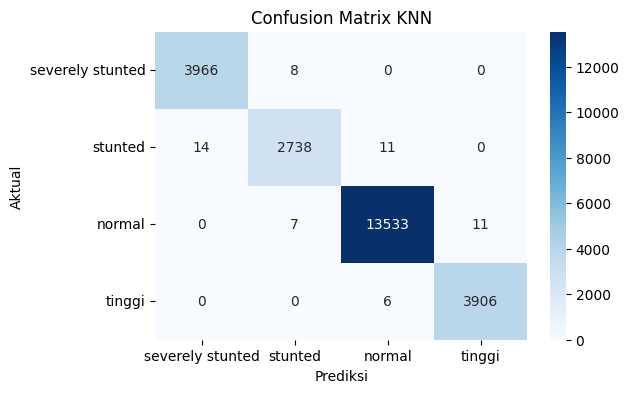

Classification Report:

                  precision    recall  f1-score   support

severely stunted       1.00      1.00      1.00      3974
         stunted       0.99      0.99      0.99      2763
          normal       1.00      1.00      1.00     13551
          tinggi       1.00      1.00      1.00      3912

        accuracy                           1.00     24200
       macro avg       1.00      1.00      1.00     24200
    weighted avg       1.00      1.00      1.00     24200



In [23]:
# TOC #6 — Evaluasi Model KNN

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_mapping.keys(),
            yticklabels=label_mapping.keys())
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix KNN')
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_mapping.keys()))

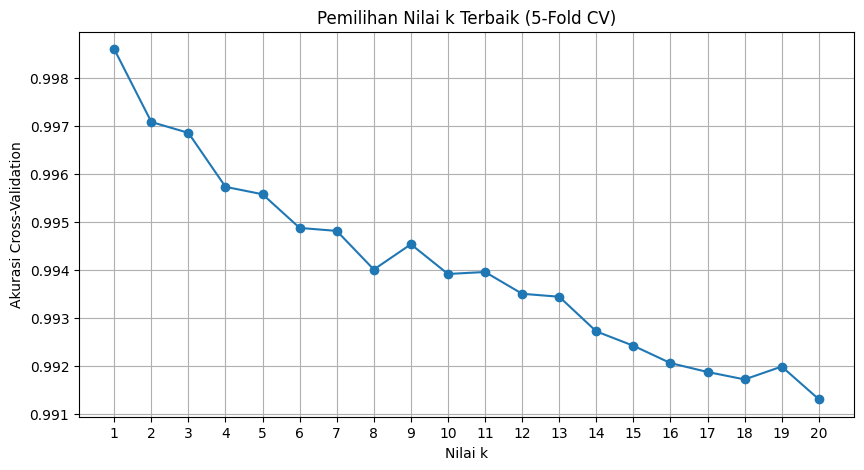

Nilai k terbaik berdasarkan CV: 1
Akurasi CV tertinggi: 0.9986


In [24]:
# TOC #7 — Cross-Validation untuk Pemilihan K Terbaik

from sklearn.model_selection import cross_val_score

k_values = list(range(1, 21))  # Coba dari k=1 sampai k=20
cv_scores = []

# Lakukan cross-validation 5-fold untuk setiap nilai k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Visualisasi hasil cross-validation
plt.figure(figsize=(10, 5))
plt.plot(k_values, cv_scores, marker='o')
plt.xticks(k_values)
plt.xlabel('Nilai k')
plt.ylabel('Akurasi Cross-Validation')
plt.title('Pemilihan Nilai k Terbaik (5-Fold CV)')
plt.grid(True)
plt.show()

# Cetak nilai k terbaik
optimal_k = k_values[cv_scores.index(max(cv_scores))]
print("Nilai k terbaik berdasarkan CV:", optimal_k)
print("Akurasi CV tertinggi:", round(max(cv_scores), 4))

In [26]:
# TOC #8 — Analisis Hasil dan Insight

# Create a reverse mapping for displaying labels
reverse_label_mapping = {v: k for k, v in label_mapping.items()}

# Tampilkan beberapa prediksi sampel
sample_index = [5, 10, 50, 100]
for i in sample_index:
    # Use reverse_label_mapping to get the string label from the predicted number
    pred_label = reverse_label_mapping[y_pred[i]]
    # Use reverse_label_mapping to get the string label from the actual number
    true_label = reverse_label_mapping[y_test.values[i]]
    print(f"Index {i}: Prediksi = {pred_label}, Aktual = {true_label}")

# Hitung jumlah prediksi per kelas
import pandas as pd

# Use the reverse_label_mapping when mapping predicted counts
pred_counts = pd.Series(y_pred).map(reverse_label_mapping).value_counts()
# Use the reverse_label_mapping when mapping actual counts
true_counts = y_test.map(reverse_label_mapping).value_counts()

print("\nDistribusi Prediksi Kelas:")
print(pred_counts)
print("\nDistribusi Aktual Kelas:")
print(true_counts)

Index 5: Prediksi = normal, Aktual = normal
Index 10: Prediksi = normal, Aktual = normal
Index 50: Prediksi = normal, Aktual = normal
Index 100: Prediksi = tinggi, Aktual = tinggi

Distribusi Prediksi Kelas:
normal              13550
severely stunted     3980
tinggi               3917
stunted              2753
Name: count, dtype: int64

Distribusi Aktual Kelas:
Status Gizi
normal              13551
severely stunted     3974
tinggi               3912
stunted              2763
Name: count, dtype: int64


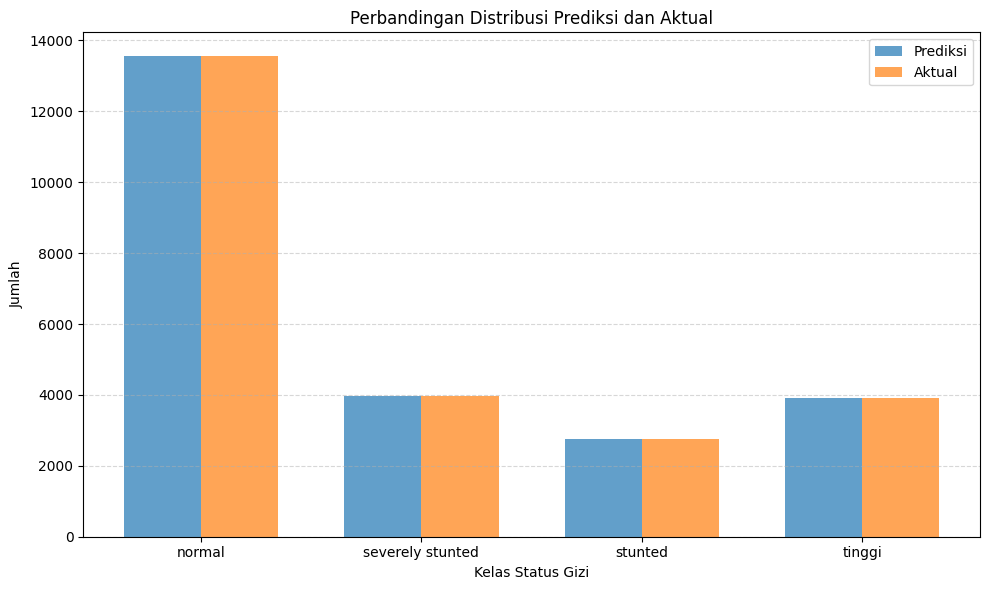

In [27]:
import matplotlib.pyplot as plt

# Plot side-by-side bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(pred_counts))

# Buat bar untuk prediksi
plt.bar(index, pred_counts.sort_index(), bar_width, label='Prediksi', alpha=0.7)

# Buat bar untuk aktual (geser posisinya)
plt.bar([i + bar_width for i in index], true_counts.sort_index(), bar_width, label='Aktual', alpha=0.7)

# Label dan judul
plt.xlabel('Kelas Status Gizi')
plt.ylabel('Jumlah')
plt.title('Perbandingan Distribusi Prediksi dan Aktual')
plt.xticks([i + bar_width/2 for i in index], pred_counts.sort_index().index)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()